In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import itertools
import cvxpy as cp
import cvxopt
from tqdm import tqdm
import seaborn as sb
from scipy.stats import skewnorm
from scipy.optimize import minimize
from tqdm import tqdm

In [ ]:
%%shell
import wget

wget -c "https://database.lichess.org/standard/lichess_db_standard_rated_2020-01.pgn.bz2"


/bin/bash: import: command not found
--2021-07-25 08:29:33--  https://database.lichess.org/standard/lichess_db_standard_rated_2020-01.pgn.bz2
Resolving database.lichess.org (database.lichess.org)... 147.135.255.84, 2001:41d0:303:2e54::
Connecting to database.lichess.org (database.lichess.org)|147.135.255.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11556638576 (11G) [application/octet-stream]
Saving to: ‘lichess_db_standard_rated_2020-01.pgn.bz2’

lichess_db_standard 100%[===================>]  10.76G  17.8MB/s    in 10m 20s 

2021-07-25 08:39:54 (17.8 MB/s) - ‘lichess_db_standard_rated_2020-01.pgn.bz2’ saved [11556638576/11556638576]



In [ ]:
!bunzip2 lichess_db_standard_rated_2020-01.pgn.bz2

In [ ]:
# while True:
#   pass

In [20]:
def fileToDf(fileName, numberToSample = 120000, maxsize = 1e6):
    file = open(fileName, "r")
    games = []
    dic = {}
    needed = ['White', 'Black','Result','WhiteElo','BlackElo']
    counter = 0
    filecounter = 0
    numData = 0
    for l in tqdm(file):
        if l[0] == "[":

            string = l[1:-1]

            header = string.split()[0]
            if (header in needed):
                dic[header] = string[len(header):-2].strip().strip('"')


        if l[0] == "1":

            counter +=1
            games.append(dic)
            del (dic)
            dic = {}
            numData += 1
            if (counter>=maxsize):
              counter = 0
              
              
              df = pd.DataFrame(games)
              df.to_csv(str(filecounter)+'.csv')
              filecounter +=1
              del (games)
              del (df)
              games = []
        else:
            pass
    if (len(games) != 0 ):
      df = pd.DataFrame(games)
      df.to_csv(str(filecounter)+'.csv')

    #df = pd.DataFrame(games)
    
    # if(len(df)> numberToSample):
    #     index = np.random.choice(np.arange(0, len(df)),size =numberToSample,replace = False)
    #     df = df.iloc[index,:]
#     df.to_csv('games.csv', index=False)

#     df1 = pd.read_csv('games.csv')
    
    return numData

In [21]:
#listOptions = "lichess_db_standard_rated_"-0


listAppend = []
year = 2020
df = pd.DataFrame()
for i in range(1):
    number_str = str(i+1)
    month  = number_str.zfill(2)
    name = "lichess_db_standard_rated_"+str(year)+'-'+month+'.pgn'
    numbers = fileToDf(name)  
    #df = df.append(fileToDf(name)    )
    
    #print(name)

936383128it [24:52, 627591.94it/s]


46737779

In [25]:
index = np.random.choice(numbers, 120000)

In [33]:
fileNumbers = index//1000000
indexInFiles = index%1000000
dfFinal = pd.DataFrame()
for data in range(np.max(fileNumbers)+1):
  indexInFile = np.where(data == fileNumbers)[0]
  
  dfChunk = pd.read_csv(str(data)+'.csv')
  dfFinal = dfFinal.append(dfChunk.iloc[indexInFile,:])

In [34]:
dfFinal

,Unnamed: 0,White,Black,Result,WhiteElo,BlackElo
17,17,residentevil4,flochess52,1-0,1771,1901
135,135,nanou28,neverevereve,1-0,1882,1740
173,173,ajedrezyul,blaugelb,1-0,2213,2269
192,192,mytredb,Rusamba25,0-1,1722,1750
338,338,Fuero2001,mutalisp,1-0,1862,1919
...,...,...,...,...,...,...
119522,119522,B3RS3RK3R,Koudounaros,1-0,2512,2241
119606,119606,Umut25,olvnervnbc,1/2-1/2,1390,1423
119734,119734,Flexman007,Nasselaine,0-1,1597,1679
119748,119748,james_mc_baden,dimon22081979,0-1,1916,1934


In [35]:
dfFinal.to_csv('2020-1.csv', index=False)

In [28]:
a =np.array([1,2,3])
a//2

array([0, 1, 1])

In [ ]:
df.to_csv('2013.csv', index=False)

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('drive/MyDrive/ricky data/')

Mounted at /content/drive


In [ ]:
# Fill in missing based on elo ratings
def win_rate_elo(elo1, elo2, alpha = np.log(10)/400):
    """
    Computes win rate of player 1 to player 2 given their elo ratings
    """
    return 1 / (1 + np.exp(-alpha * (elo1 - elo2)))

In [ ]:
df = pd.read_csv('2013.csv')

In [ ]:
df.head()

,White,Black,Result,WhiteElo,BlackElo
0,reji,ChessThom,0-1,1546,1707
1,tiby312,speakerc,1-0,1123,1313
2,allwayswinner,anatolypalomov,0-1,1510,1577
3,sina,kramer,1-0,1317,954
4,ChikiPuki,Eldorado,1-0,1585,1239


In [ ]:
df = df.rename(columns = {'White': 'white_player', 'Black': 'black_player', 'Result':'result',
                         'WhiteElo': 'white_elo', 'BlackElo':'black_elo'})

df.head()

,white_player,black_player,result,white_elo,black_elo
0,reji,ChessThom,0-1,1546,1707
1,tiby312,speakerc,1-0,1123,1313
2,allwayswinner,anatolypalomov,0-1,1510,1577
3,sina,kramer,1-0,1317,954
4,ChikiPuki,Eldorado,1-0,1585,1239


In [ ]:
df[df['result'] == '*']

,white_player,black_player,result,white_elo,black_elo


In [ ]:
possible_results = ['0-1', '1-0', '1/2-1/2']
drop_idx = df[~df['result'].isin(possible_results)].index
df = df.drop(drop_idx)

df[df['result'] == '*']

,white_player,black_player,result,white_elo,black_elo


Drop unknown elo ratings

In [ ]:
drop_idx = df[df['white_elo'] == '?'].index
df = df.drop(drop_idx)

df[df['white_elo'] == '?']

,white_player,black_player,result,white_elo,black_elo


In [ ]:
drop_idx = df[df['black_elo'] == '?'].index
df = df.drop(drop_idx)

df[df['black_elo'] == '?']

,white_player,black_player,result,white_elo,black_elo


In [ ]:
# Convert to win-draw-lose
df.loc[df['result'] == '0-1', 'result'] = -1
df.loc[df['result'] == '1-0', 'result'] = 1
df.loc[df['result'] == '1/2-1/2', 'result'] = 0

In [ ]:
# Convert ratings to integers
df['white_elo'] = np.array(df['white_elo']).astype('int64')
df['black_elo'] = np.array(df['black_elo']).astype('int64')

In [ ]:
white_elos = np.array(df['white_elo'])
black_elos = np.array(df['black_elo'])

(array([1.32000e+03, 1.37680e+04, 8.62020e+04, 2.92576e+05, 4.88356e+05,
        3.73553e+05, 1.41224e+05, 3.64530e+04, 4.31700e+03, 8.50000e+01]),
 array([ 762. ,  943.1, 1124.2, 1305.3, 1486.4, 1667.5, 1848.6, 2029.7,
        2210.8, 2391.9, 2573. ]),
 <a list of 10 Patch objects>)

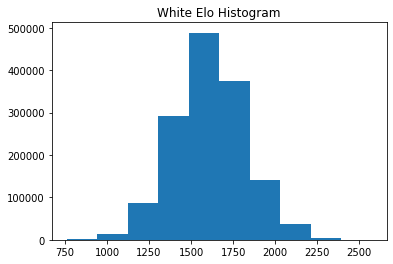

In [ ]:
plt.title('White Elo Histogram')
plt.hist(white_elos)

(array([2.38300e+03, 2.15740e+04, 1.09684e+05, 3.10273e+05, 4.90990e+05,
        3.35001e+05, 1.28110e+05, 3.54360e+04, 4.33000e+03, 7.30000e+01]),
 array([ 778. ,  958.1, 1138.2, 1318.3, 1498.4, 1678.5, 1858.6, 2038.7,
        2218.8, 2398.9, 2579. ]),
 <a list of 10 Patch objects>)

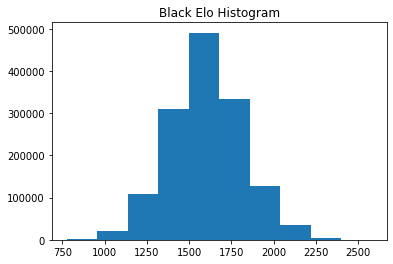

In [ ]:
plt.title('Black Elo Histogram')
plt.hist(black_elos)

In [ ]:
white_ratings, counts = np.unique(white_elos, return_counts = True)
black_ratings, counts = np.unique(black_elos, return_counts = True)

In [ ]:
white_min = np.min(white_elos); white_max = np.max(white_elos)
black_min = np.min(black_elos); black_max = np.max(black_elos)

print(f"For white, min = {white_min}, max = {white_max}")
print(f"For black, min = {black_min}, max = {black_max}")

# Bounds should be the 'loose' one. Might want to cut down in case there's no matchups
lb = min(white_min, black_min); ub = max(white_max, black_max)
print(f"Bins range {lb} - {ub}")

For white, min = 762, max = 2573
For black, min = 778, max = 2579
Bins range 762 - 2579


## Creating the payoffs

### Method 1: Sample uniformly n-bins from the range above, and average the win rate. Win counts for +1, loss -1, draw 0

In [ ]:
def create_bins(lower_bound, upper_bound, n):
    width = (upper_bound - lower_bound) / n
    
    ub = lower_bound + width; lb = lower_bound; bins = [(lb, ub)]
    for _ in range(n-1):
        lb += width; ub += width; bins.append((lb, ub))
    
    return bins

def within(bin_range, num):
    return num >= bin_range[0] and num < bin_range[1]

In [ ]:
# Check if data contains lower ratings beating greater ratings
sieve_greater = (df['white_elo'] <= df['black_elo']) & (df['result'] >= 0)
df[sieve_greater]

,white_player,black_player,result,white_elo,black_elo
1,tiby312,speakerc,1,1123,1313
11,Shlomo,Karen_Armenia,1,1675,1680
12,dyson,chavosh,1,1576,1585
14,Fisher62,Voltvolf,1,1655,1781
23,balex,flatron1,0,1518,1650
...,...,...,...,...,...
1439976,escipion,sagenwald,1,1621,1708
1439980,chessekb,cordobesista,1,1743,1806
1439982,fil77,molehill,1,1500,1527
1439995,joajagua,Peapop,1,1614,1714


In [ ]:
# Check if data contains lower ratings beating greater ratings
sieve_greater = (df['black_elo'] <= df['white_elo']) & (df['result'] <= 0)
df[sieve_greater]

,white_player,black_player,result,white_elo,black_elo
6,Yarilo,ptdhina,-1,1768,1675
7,andresneno,oilmanesh,-1,1933,1842
10,Baboon,molaya,-1,1521,1499
29,alfix,E_R,-1,1433,1415
33,carlos013,Kyklades,-1,1717,1657
...,...,...,...,...,...
1439985,lking,Aceves,-1,1643,1512
1439988,Romoda,sezwho,-1,2070,1926
1439989,eli_lovett,reaper101,0,1415,1346
1439994,zembelek,ghiceda,-1,2076,1959


In [ ]:
wlb, wub = (1829, 1832); blb, bub = (2001, 2003)

In [ ]:
sieve_w = (df['white_elo'] < wub) & (df['white_elo'] > wlb)
df_sieve_w = df[sieve_w]
df_sieve_w['black_elo'].unique()

array([2041, 1630, 1701, 1459, 1603, 1589, 1960, 2066, 1911, 1526, 1886,
       1897, 1676, 1469, 2006, 1849, 1924, 1800, 1814, 1736, 1772, 1915,
       1795, 1540, 1759, 1620, 1531, 1846, 1970, 1560, 2057, 1660, 1604,
       1791, 2085, 1746, 1768, 1739, 1977, 1695, 1532, 1737, 1696, 2116,
       2067, 1990, 1634, 1423, 1563, 1663, 1841, 1811, 1789, 1541, 1865,
       1228, 2217, 2001, 1724, 1659, 1857, 1735, 1517, 1828, 1706, 1391,
       1584, 1999, 1856, 1761, 1767, 1185, 1854, 1682, 1568, 1451, 1738,
       1556, 1752, 1808, 1500, 2112, 2091, 1548, 1689, 1997, 1533, 1867,
       1577, 1422, 1818, 1399, 1413, 1164, 1946, 1731, 1429, 1602, 2163,
       1824, 1415, 1648, 1757, 1745, 1527, 1908, 1271, 1805, 1941, 1842,
       1715, 1765, 1719, 1571, 2027, 1776, 1909, 1284, 1781, 1707, 1405,
       1709, 1513, 2136, 1965, 1996, 1410, 1798, 1952, 1726, 1725, 1815,
       1890, 1962, 1482, 1935, 2105, 1778, 1690, 1638, 2025, 1544, 1901,
       1717, 1543, 1654, 1887, 1972, 1969, 1657, 18

In [ ]:
# Functions
def create_payoff(n, bin_lb, bin_ub):
    # Construct payoff template and bins
    # Also returns marker array, to indicate whether one missing, both missing, or none missing
    bins = np.array(create_bins(bin_lb, bin_ub, n))
    payoff = np.ones((n, n)) * -8; np.fill_diagonal(payoff, 0)
    
    # Marker matrix to indicate missing data. 1 for both present, -1 for p1 white, -2 for p1 black, -3 for both series
    mat = np.zeros((n, n))
    
    for i in tqdm(range(len(bins))):
        for j in range(len(bins)):
           # These are actually p1 and p2 ratings. We want to find where this p1 rating is white vs p2 black and
            # then vice versa
            p1_bin_lb, p1_bin_ub = bins[i]
            p2_bin_lb, p2_bin_ub = bins[j] 
            
            # Mid-bin rating to predict if missing
            p1_rating = (p1_bin_ub + p1_bin_lb) / 2
            p2_rating = (p2_bin_ub + p2_bin_lb) / 2
            
            if p1_bin_lb >= p2_bin_lb:
                continue
            else:
                # Sieve off data
                p1_white = (df['white_elo'] < p1_bin_ub) & (df['white_elo'] >= p1_bin_lb)
                p2_white = (df['white_elo'] < p2_bin_ub) & (df['white_elo'] >= p2_bin_lb)

                p1_black = (df['black_elo'] < p1_bin_ub) & (df['black_elo'] >= p1_bin_lb)
                p2_black = (df['black_elo'] < p2_bin_ub) & (df['black_elo'] >= p2_bin_lb)

                # Count data available
                p1_white_counts = np.sum(p1_white); p1_black_counts = np.sum(p1_black)
                p2_white_counts = np.sum(p2_white); p2_black_counts = np.sum(p2_black)

                # bool_ser1 = p1 white and p2 black; bool_ser2 = p1 black and p2 white
                bool_ser1 = p1_white & p2_black; bool_ser2 = p1_black & p2_white
                ser1_count = np.sum(bool_ser1); ser2_count = np.sum(bool_ser2)

                if ser1_count != 0 and ser2_count != 0:
                    # Both matchups exist in data
                    # To get average, must put a - b, since if black wins, result is -1. Payoff matrix
                    # is wrt to player 1
                    value = (np.mean(df[bool_ser1]['result']) - np.mean(df[bool_ser2]['result'])) / 2
                    payoff[i,j] = value
                    payoff[j,i] = -value
                    mat[i,j] = 1; mat[j,i] = 1
                else:
                    if ser1_count !=0 and ser2_count == 0:
                        # i.e. series 2 matchup don't exist. Hence series 1 use real data
#                         print(f"P1 rating {(p1_bin_lb, p1_bin_ub)}, P2 rating {(p2_bin_lb, p2_bin_ub)}, series 2 missing")
                        ser1_rate = np.mean(df[bool_ser1]['result'])

                        # Predict series 2 with elo. This don't care who is white/black
                        # NOTE: win probability is probability of player 1 winning, yielding a reward of +1
                        # To find expected score, must multiply probability with score
                        win_prob = win_rate_elo(p1_rating, p2_rating)
                        ser2_rate = win_prob * 1 + (1 - win_prob) * -1
                
                        value = (ser1_rate + ser2_rate) / 2
                        payoff[i,j] = value
                        payoff[j,i] = -value
                        mat[i,j] = -2
                        mat[j,i] = -2

                    if ser1_count == 0 and ser2_count != 0:
                        # i.e. series 1 matchup don't exist. Hence series 2 use real data
#                         print(f"P1 rating {(p1_bin_lb, p1_bin_ub)}, P2 rating {(p2_bin_lb, p2_bin_ub)}, series 1 missing")
                        win_prob = win_rate_elo(p1_rating, p2_rating)
                        ser1_rate = win_prob * 1 + (1 - win_prob) * -1
                        ser2_rate = np.mean(df[bool_ser2]['result'])
                        value = (ser1_rate - ser2_rate) / 2
                        payoff[i,j] = value
                        payoff[j,i] = -value
                        mat[i,j] = -1; mat[j,i] = -1

                    if ser1_count == 0 and ser2_count == 0:
#                         print(f"P1 rating {(p1_bin_lb, p1_bin_ub)}, P2 rating {(p2_bin_lb, p2_bin_ub)}, both missing")
                        # i.e. both are missing, predict using elo
                        win_prob = win_rate_elo(p1_rating, p2_rating)
                        value = win_prob * 1 + (1 - win_prob) * (-1)
                        payoff[i,j] = value
                        payoff[j,i] = -value
                        mat[i,j] = -3; mat[j,i] = -3
                        
    return payoff, mat


def create_payoff_2(white_bins, black_bins):
    # Construct payoff template and bins
    # Also returns marker array, to indicate whether one missing, both missing, or none missing
    n_row = len(white_bins); n_col = len(black_bins)
    payoff = np.ones((n_row, n_col)) * -8; np.fill_diagonal(payoff, 0)
    
    # Marker matrix to indicate missing data. 1 for both present, -1 for p1 white, -2 for p1 black, -3 for both series
    mat = np.zeros((n_row, n_col))
    
    for i in tqdm(range(n_row)):
        for j in range(n_col):
           # These are actually p1 and p2 ratings. We want to find where this p1 rating is white vs p2 black and
            # then vice versa
            p1_bin_lb, p1_bin_ub = white_bins[i]
            p2_bin_lb, p2_bin_ub = black_bins[j]
            
            # Mid-bin rating to predict if missing
            p1_rating = (p1_bin_ub + p1_bin_lb) / 2
            p2_rating = (p2_bin_ub + p2_bin_lb) / 2
            
            if p1_bin_lb >= p2_bin_lb:
                continue
            else:
                # Sieve off data
                p1_white = (df['white_elo'] < p1_bin_ub) & (df['white_elo'] >= p1_bin_lb)
                p2_white = (df['white_elo'] < p2_bin_ub) & (df['white_elo'] >= p2_bin_lb)

                p1_black = (df['black_elo'] < p1_bin_ub) & (df['black_elo'] >= p1_bin_lb)
                p2_black = (df['black_elo'] < p2_bin_ub) & (df['black_elo'] >= p2_bin_lb)

                # Count data available
                p1_white_counts = np.sum(p1_white); p1_black_counts = np.sum(p1_black)
                p2_white_counts = np.sum(p2_white); p2_black_counts = np.sum(p2_black)

                # bool_ser1 = p1 white and p2 black; bool_ser2 = p1 black and p2 white
                bool_ser1 = p1_white & p2_black; bool_ser2 = p1_black & p2_white
                ser1_count = np.sum(bool_ser1); ser2_count = np.sum(bool_ser2)

                if ser1_count != 0 and ser2_count != 0:
                    # Both matchups exist in data
                    # To get average, must put a - b, since if black wins, result is -1. Payoff matrix
                    # is wrt to player 1
                    value = (np.mean(df[bool_ser1]['result']) - np.mean(df[bool_ser2]['result'])) / 2
                    payoff[i,j] = value
                    payoff[j,i] = -value
                    mat[i,j] = 1; mat[j,i] = 1
                else:
                    if ser1_count !=0 and ser2_count == 0:
                        # i.e. series 2 matchup don't exist. Hence series 1 use real data
#                         print(f"P1 rating {(p1_bin_lb, p1_bin_ub)}, P2 rating {(p2_bin_lb, p2_bin_ub)}, series 2 missing")
                        ser1_rate = np.mean(df[bool_ser1]['result'])

                        # Predict series 2 with elo. This don't care who is white/black
                        # NOTE: win probability is probability of player 1 winning, yielding a reward of +1
                        # To find expected score, must multiply probability with score
                        win_prob = win_rate_elo(p1_rating, p2_rating)
                        ser2_rate = win_prob * 1 + (1 - win_prob) * -1
                
                        value = (ser1_rate + ser2_rate) / 2
                        payoff[i,j] = value
                        payoff[j,i] = -value
                        mat[i,j] = -2
                        mat[j,i] = -2

                    if ser1_count == 0 and ser2_count != 0:
                        # i.e. series 1 matchup don't exist. Hence series 2 use real data
#                         print(f"P1 rating {(p1_bin_lb, p1_bin_ub)}, P2 rating {(p2_bin_lb, p2_bin_ub)}, series 1 missing")
                        win_prob = win_rate_elo(p1_rating, p2_rating)
                        ser1_rate = win_prob * 1 + (1 - win_prob) * -1
                        ser2_rate = np.mean(df[bool_ser2]['result'])
                        value = (ser1_rate - ser2_rate) / 2
                        payoff[i,j] = value
                        payoff[j,i] = -value
                        mat[i,j] = -1; mat[j,i] = -1

                    if ser1_count == 0 and ser2_count == 0:
#                         print(f"P1 rating {(p1_bin_lb, p1_bin_ub)}, P2 rating {(p2_bin_lb, p2_bin_ub)}, both missing")
                        # i.e. both are missing, predict using elo
                        win_prob = win_rate_elo(p1_rating, p2_rating)
                        value = win_prob * 1 + (1 - win_prob) * (-1)
                        payoff[i,j] = value
                        payoff[j,i] = -value
                        mat[i,j] = -3; mat[j,i] = -3
                        
    return payoff, mat
            
class NashCluster():
    
    def __init__(self, strat_payoffs, ori_idx, pvect):
        self.size = strat_payoffs.shape[0]
        self.payoffs = strat_payoffs
        self.strat_idx = ori_idx
        self.probability = pvect
        
    def computeRPS(self):
        return None
    
def solve_MaxEnt_NE(payoff, verbose = False, eps = 1e-5, zero_tol = 1e-6, iters = 500, cycle = 5):
    
    init_val = np.random.uniform(size = payoff.shape[0])
    init_val = init_val / np.sum(init_val)
    
    p = cp.Variable(payoff.shape[0], value = init_val)
    constraints = [payoff @ p <= 0, cp.sum(p) == 1, p >= 0]
    objective = cp.sum(cp.entr(p))
    prob = cp.Problem(cp.Maximize(objective), constraints)
    
    try:
      cycle_count = 0; done = False
      while cycle_count < cycle and done is False:
        prob.solve(verbose = verbose, solver = cp.MOSEK, warm_start = True)
        p_vect = p.value * (p.value > zero_tol)
        diff = payoff @ p_vect.reshape(-1, 1)
        print(f"Cycle count {cycle_count}, diff = {np.sum(diff >= eps)}")
        done = True if np.sum(diff >= eps) == 0 else False
        cycle_count += 1
    except cp.SolverError:
      print("MOSEK FAILED?")
      try:
        # Try ECOS_BB first
        cycle_count = 0; done = False
        while cycle_count < cycle and done is False:
          prob.solve(verbose = verbose, max_iters = 1000, solver = cp.ECOS_BB, warm_start = True)
          p_vect = p.value * (p.value > zero_tol)
          diff = payoff @ p_vect.reshape(-1, 1)
          print(f"Cycle count {cycle_count}, diff = {np.sum(diff >= eps)}")
          done = True if np.sum(diff >= eps) == 0 else False
          cycle_count += 1
      except cp.SolverError:
        print("ECOS_BB FAILED")
        cycle_count = 0; done = False
        while cycle_count < cycle and done is False:
          prob.solve(verbose = verbose, max_iters = iters, solver = cp.SCS, warm_start = True)
          p_vect = p.value * (p.value > zero_tol)
          diff = payoff @ p_vect.reshape(-1, 1)
          print(f"Cycle count {cycle_count}, diff = {np.sum(diff >= eps)}")
          done = True if np.sum(diff >= eps) == 0 else False
          cycle_count += 1
  
    # Clean - small values
    p_vect = p_vect * (p_vect > zero_tol)
    return p_vect, np.sum(diff>=eps)
    
def Nash_Clustering(payoff, marker, algo = "cvx", eps = 1e-4, zero_tol = 1e-8):
    n_strat = payoff.shape[0]; counter = 0;

    # This is the remaining payoff and the remaining strategy indexes
    curr_payoff = payoff; curr_remaining = np.arange(n_strat); curr_marker = marker
    nash_clusters = []; unsolved_cases = []; marker_instances = []

    while n_strat > 1: # if only 1 strategy remaining, this itself is the nash cluster
        print(f"Iteration {counter}")

        # # Compute the NE supports. Lemke Howson seems the fastest
        # game = nash.Game(curr_payoff + np.eye(curr_payoff.shape[0]) * 1e-10)
        # if algo == "Lemke":
        #     nash_eqs = game.lemke_howson_enumeration()
        #     nash_eq = np.array(next(nash_eqs)[0])

        # if algo == 'Support': # slow because enumerates all possible NE supports
        #     nash_eqs = game.support_enumeration()
        #     nash_eq = np.array(next(nash_eqs)[0])

        # if algo == 'Vertex':
        #     nash_eqs = game.vertex_enumeration()
        #     nash_eq = np.array(next(nash_eqs)[0])

        if algo == 'cvx': # solve using cvxpy, seems to be the only one working for now
            nash_eq, diff = solve_MaxEnt_NE(curr_payoff, eps =1e-4, zero_tol = zero_tol, iters = int(2e4), cycle = 5)
            print(f"Outside, diff = {diff}")
            p_vect = nash_eq[nash_eq >= zero_tol]
            if diff > -10:
              print("APPENDING UNSOLVED CASE")
              unsolved_cases.append(curr_payoff)
              marker_instances.append(curr_marker)

        # Take the supports, exclude them in the next round payoffs
        taken_strat = np.where(nash_eq >= zero_tol)[0]; remaining_strat = np.where(nash_eq < zero_tol)[0]
        
        if len(taken_strat) != len(p_vect):
            print("WTF")
            print(taken_strat, p_vect)
        taken_idx = np.array(list(itertools.product(taken_strat, repeat = 2)))
        remaining_idx = np.array(list(itertools.product(remaining_strat, repeat = 2)))

        strat_payoffs = payoff[taken_idx[:,0], taken_idx[:, 1]].reshape(taken_strat.shape[0], taken_strat.shape[0])
        nash_clusters.append(NashCluster(strat_payoffs, curr_remaining[taken_strat], p_vect))

        # Get the remaining payoff. If statement here to prevent cases when remaining_idx is empty and [:,0] wont work
        if len(remaining_strat) > 0:
          curr_payoff = curr_payoff[remaining_idx[:,0], remaining_idx[:,1]].reshape(remaining_strat.shape[0], remaining_strat.shape[0])
          curr_remaining = curr_remaining[remaining_strat]
          curr_marker = curr_marker[remaining_idx[:,0], remaining_idx[:,1]].reshape(remaining_strat.shape[0], remaining_strat.shape[0])

        n_strat -= strat_payoffs.shape[0]

        counter += 1
        print(f"Strategies left {n_strat}")
        print(f"Payoff remaining size {curr_payoff.shape[0]}") 

    if n_strat == 1:
        nash_clusters.append(NashCluster(curr_payoff, curr_remaining, np.array([1])))

    return nash_clusters, marker_instances, unsolved_cases

def plot_results(nash_clusters, title):
  nc_sizes = []
  for nc in nash_clusters:
      nc_sizes.append(nc.size)

  y_ax = np.linspace(1, 0, len(nc_sizes))
  plt.scatter(nc_sizes, y_ax)
  plt.title(title)
  plt.ylabel('Fraction Beaten')
  plt.xlabel('Cluster Size')

def compute_RPP(nc1, nc2, payoff):
    p_vect1 = np.zeros(payoff.shape[0]); p_vect2 = np.zeros(payoff.shape[0])
    
    p_vect1[nc1.strat_idx] = nc1.probability; p_vect2[nc2.strat_idx] = nc2.probability
    return (p_vect1.reshape(1, -1) @ payoff @ p_vect2.reshape(-1, 1)).item()
    
def generate_RPP_data(nash_clusters, payoff):
    data_tuples_rpp = []; n_nc = len(nash_clusters); data_tuples_rpp_sign = []; rpp_mat = np.zeros((n_nc, n_nc))
    for i, nc_i in enumerate(nash_clusters):
        rpp_sum = 0; rpp_sign_sum = 0
        for j, nc_j in enumerate(nash_clusters):
            if i != j:
                rpp = compute_RPP(nc_i, nc_j, payoff)
                rpp_mat[i,j] = rpp
                rpp_sum += rpp
                rpp_sign_sum += 1 * (rpp >= 0)

        rpp_sum = rpp_sum / n_nc; rpp_sign_sum = rpp_sign_sum / (n_nc - 1)

        data_tuples_rpp.append([nc_i.size, rpp_sum])
        data_tuples_rpp_sign.append([nc_i.size, rpp_sign_sum])

    return np.array(data_tuples_rpp), np.array(data_tuples_rpp_sign), rpp_mat

def generate_RPS_data(payoff):
    signed_payoff = 1 * (payoff > 0)
    strat_winrate = np.mean(payoff > 0, axis = 1)
    adj = signed_payoff @ signed_payoff @ signed_payoff
    
    return np.diag(adj), strat_winrate

def plot_RPS(adj, strat_winrate, title):
    plt.title(title)
    plt.xlabel('RPS Cycles')
    plt.ylabel('Mean Win-Rate')
    plt.scatter(adj, strat_winrate)
    
def plot_nash_clusters_2(sign_rpp, title):
    plt.scatter(sign_rpp[:, 0], sign_rpp[:, 1])
    plt.title(title)
    plt.ylabel('Fraction Beaten (RPP)')
    plt.xlabel('Cluster Size')
    
def plot_nash_clusters_3(sign_rpp, title):
    plt.scatter(sign_rpp[:, 0], sign_rpp[:, 1])
    plt.title(title)
    plt.ylabel('Fraction Beaten (RPP)')
    plt.xlabel('Cluster Size')
    
    # Fit skewed normal
    y_data = sign_rpp[:, 0]; x_data = sign_rpp[:, 1]
    init = np.random.uniform(1, 3, size = (5))
    params = fit_skewed_normal(init, x_data, y_data)
    
    inputs = np.linspace(0, 1, 1000)
    outputs = affine_skewed_normal_pdf(params, inputs)
    plt.plot(outputs, inputs)
    
# Test using scipy.optimize.minimize. Need a function to minimize with signature function(x, *args), where x is a list
# of the parameters to optimize. Syntax: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
def affine_skewed_normal_loss(parameters, xdata, ydata):
    """
    parameters shape is [\mu, \sigma, \alpha, \a, \b]
    """
    mu, sigma, alpha, a, b = parameters
    
    # Compute the loss
    out = a * (sigma ** 2) * skewnorm.pdf(xdata, alpha, mu, sigma**2) + b
#     out = a * skewnorm.pdf(xdata, alpha, mu, sigma) + b
    loss = np.sum((out - ydata) ** 2)
    
    return loss

def affine_skewed_normal_pdf(parameters, xdata):
    mu, sigma, alpha, a, b = parameters
    out = a * (sigma ** 2) * skewnorm.pdf(xdata, alpha, mu, sigma**2) + b
#     out = a * skewnorm.pdf(xdata, alpha, mu, sigma) + b
    return out

def fit_skewed_normal(init, xdata, ydata):
    bnds = [(None, None), (1e-15, None), (None, None), (None, None), (None, None)]
    results = minimize(affine_skewed_normal_loss, init, args = (xdata, ydata), bounds = bnds, tol = 1e-8)
    return results.x

def compute_win_rate(curr_idx, payoff):
    return np.mean(payoff[curr_idx, :])

In [ ]:
print(cp.installed_solvers())

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCS']


In [ ]:
bins = create_bins(800,2500,1000)

In [ ]:
payoff, marker = create_payoff_2(bins[:500],bins[500:])

100%|██████████| 500/500 [3:00:58<00:00, 21.72s/it]


In [ ]:
marker

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def savePickle(location, var, name):
    with open(location+name+'.pickle', 'wb') as handle:
        pickle.dump(var, handle, protocol=pickle.HIGHEST_PROTOCOL)
def openPickle(location,name):
    filename = location+name+'.pickle'
    with open(filename,'rb') as f:
        var = pickle.load(f)
    return var

In [ ]:
import pickle

In [ ]:
savePickle("",payoff,"payoff[:500,500:]")
savePickle("",marker,"marker[:500,500:]")

### Chess 1000 x 1000

In [ ]:
payoff, markers = create_payoff(1000, 800, 2500)
where_zeros = np.where(np.abs(payoff) <= 1e-7)
payoff[where_zeros[0], where_zeros[1]] = 0

 25%|██▌       | 254/1000 [1:34:57<4:08:54, 20.02s/it]